In [3]:
import pickle as pk
import matplotlib.pyplot as plt
import time
import math

In [4]:
isp = "台灣固網"
with open ("/home/antslab/NAS1_RAID6/pcap_inter/2020_01_06/" + isp + "/case_pickles/http_trend_df_20200106_20200107_20200108_20200109_20200110_20200111_20200112.pkl", "rb")as file:
    df = pk.load(file)
# with open ("/home/antslab/NAS1_RAID6/pcap_inter/2020_01_06/" + isp + "/case_pickles/http_trend_df_20200106_20200107.pkl", "rb")as file:
#     df = pk.load(file)

In [5]:
df

,idx,timestamp,country,src_ip,ssdeep
0,20200106_15733,"[1578239430.546177, 1578239430.627715, 1578239...","[United States, United States, United States, ...","[66.249.69.175, 66.249.69.145, 66.249.71.5, 66...",[48:+eWa5lO918hw18VcM18xdnXtctdLJCAY6S:+eXg91u...
1,20200106_11,"[1578239432.840303, 1578239433.815947, 1578239...","[China, Colombia, United States, United States...","[47.74.186.195, 186.159.6.116, 156.236.69.145,...",[96:iYvlb3nXNjvQb9jvqbKPoVpnXNoozoEcPro+sdZxnX...
2,20200106_177,"[1578239428.145726, 1578239432.99058, 15782394...","[Netherlands, United States, Iran, United Stat...","[169.197.108.38, 216.244.66.198, 217.60.228.17...",[12:rHXq6xKv89IshSR56Y1awh5UPlVFYNjZpvhm:Da5kW...
3,20200106_51539642503,"[1578248664.635621, 1578248842.672464, 1578249...","[Hong Kong, Egypt, Hong Kong, China, China, Ch...","[103.90.203.174, 193.227.5.230, 103.90.203.174...",[12:7KS3TXcHnMQ7s95HfUzUfszUfsYjmHXq/Ish+j51h1...
4,20200107_163208783880,"[1578335637.856748, 1578364341.518676, 1578373...","[Indonesia, None, Germany, Germany, Germany, U...","[180.249.180.107, 141.98.254.225, 185.220.101....",[96:FnXNFCPU3MoqnXNU3MnEU3MNL3A0ZznXFf0ZBsG0ZO...
...,...,...,...,...,...
310,20200112_171798722946,"[1578795292.443264, 1578829769.715881]","[United States, China]","[192.241.223.145, 101.4.136.34]",[96:wwaPzzZ4nXNzz2uzzU5PUd+nXNUd9UdM3knXFjCPzt...
311,20200112_180388661998,"[1578785066.774581, 1578785102.163436]","[France, Russia]","[94.23.218.85, 46.235.53.26]",[96:sfIPiUVnXNiUqiUvP8QbnutnXN8QbnZn8Qbnno3UVt...
312,20200112_360777278927,"[1578789832.118877, 1578793252.137233]","[Thailand, India]","[146.88.51.234, 13.232.204.214]",[96:n3GZvnXF7Z9xZC32BlKnXF2Ba+2Bmr3soQJnXFso3r...
313,20200112_403726969763,"[1578759854.017082, 1578830376.011211]","[Thailand, India]","[61.90.77.145, 13.232.204.214]",[96:eOLnXN5nBx5n/G3UXZ5nXFUWZ7UWZsPrEs5nXNrEsQ...


In [3]:
def constructTimePair(start_date, end_date):
    time_pair = []
    candidate_date = [i for i in range(start_date, end_date + 1)]
    for date in candidate_date:
        if (date-1, 23) not in time_pair:
            time_pair.append((date-1, 23))
        for i in range(24):
            time_pair.append((date, i))
    return time_pair

In [4]:
time_pair = constructTimePair(6, 12)
# time_pair = constructTimePair(6, 7)
origin_time_list = df.timestamp.to_list() #未過濾的攻擊手法群的timestamp
origin_idx_list = df.idx.to_list() #未過濾的攻擊手法群的cluster id

In [5]:
# 選擇過濾後的攻擊手法群
# 先讀進過濾後的所有攻擊手法id
with open("/home/antslab/NAS1_RAID6/pcap_inter/2020_01_06/" + isp + "/case_pickles/clusters_ips_stat_afterFilter_df_20200106_20200112.pkl","rb")as file:
    df2 = pk.load(file)
denoise_cluster = df2.keys()

denoise_cluster2 = []
# 篩選特定 protocol 攻擊手法
for cid in denoise_cluster:
    protocol = cid.split("_")[-1]
    if protocol == 'http':
        denoise_cluster2.append(cid)

In [6]:
time_list = []
idx_list = []
protocol = 'http'
for i in range(len(origin_idx_list)):
    cid = origin_idx_list[i] + "_" + protocol
    if cid in denoise_cluster2:# and cid in threat_3:
        time_list.append(origin_time_list[i])
        idx_list.append(cid)

In [7]:
# 選擇攻擊手法群範圍
start = 0
# end = len(time_list)
end = 10
idx_list = idx_list[start:end]

In [8]:
point_size_value = []
for i in range(start, end):
    x_axis_org = []
    sample = time_list[i]
    point_size_value.append([])
    for timestamp in sample:
        tm_mday = time.localtime(timestamp).tm_mday
        tm_hour = time.localtime(timestamp).tm_hour
        x_axis_org.append((tm_mday, tm_hour))
    for pair in time_pair:
        try: # prevent math error (when use math.log)
#             point_size_value[i].append(math.log(x_axis_org.count(pair)))
            point_size_value[i-start].append(x_axis_org.count(pair))
        except: # x_axis_org.count(pair) = 0  
            point_size_value[i-start].append(0)

In [9]:
# 記錄每個 cluster 橫跨幾個小時，並以此作為 x 值
hour_list = []
for i in range(start, end):
    hour_list.append([])
    for j in range(len(time_pair)):
        hour_list[i-start].append(j)

In [10]:
# 記錄 y 值，最大的cluster會被畫在最上面
y_axis_value = []
for i in range(start, end):
    y_axis_value.append([])
    for j in range(len(time_pair)):
        y_axis_value[i-start].append(i)
# 由上而下按照cluster大小去畫圖
y_axis_value.reverse()

In [11]:
idx_list[0:11]

['20200106_15733_http',
 '20200106_177_http',
 '20200106_51539642503_http',
 '20200106_136_http',
 '20200106_2386_http',
 '20200106_593_http',
 '20200106_16165_http',
 '20200106_4351_http',
 '20200106_42949674862_http',
 '20200106_2177_http']

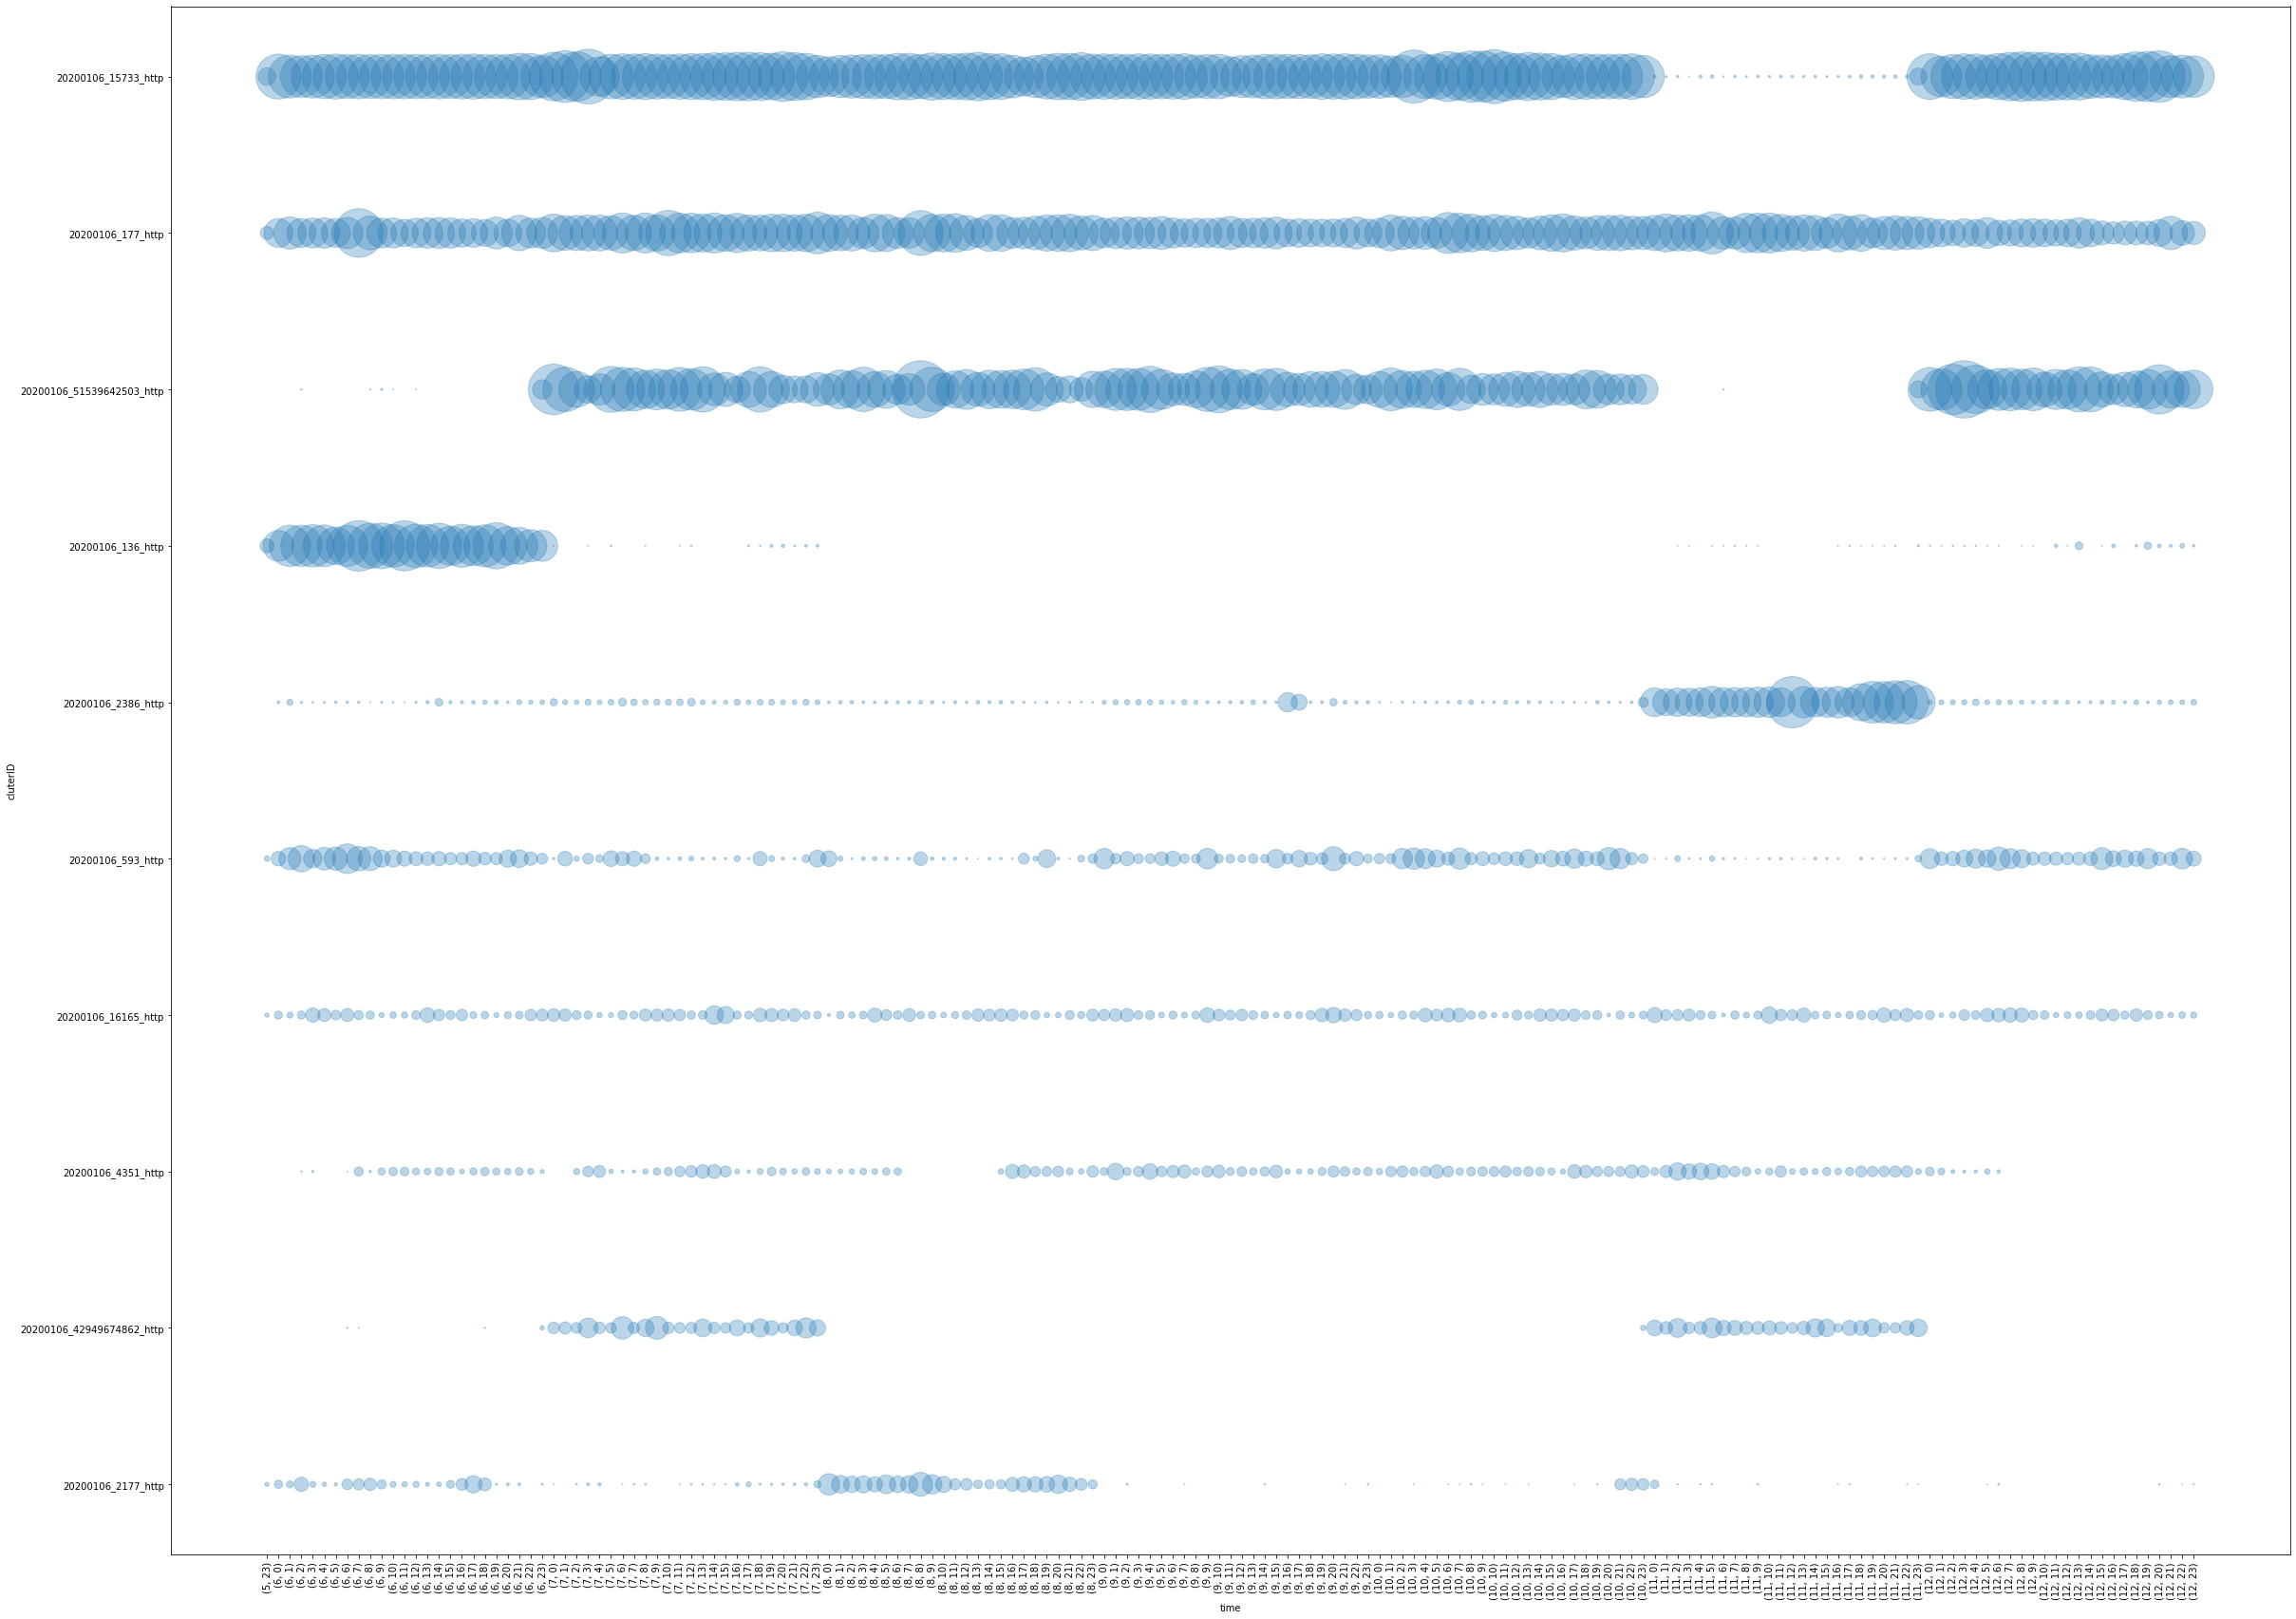

In [12]:
plt.figure(figsize=(40,30))
plt.xlabel("time")
plt.ylabel("cluterID")
plt.xticks([i for i in range(len(time_pair))],time_pair, rotation=90)
# 畫 cluster origin index
plt.yticks([y_axis_value[i][0] for i in range(len(y_axis_value))], [idx_list[i] for i in range(len(idx_list))])
plt.scatter(hour_list, y_axis_value, s = point_size_value, alpha=0.3)
# plt.savefig("./figure/protocol_pattern/http/" + isp + "_20200106_20200107_20200108_20200109_20200110_20200111_20200112.png")
# plt.savefig("./figure/protocol_pattern/http/" + isp + "_20200106_20200107.png")